## 5장에서 살펴본 붓꽃 데이터를 입력으로하여 Versicolor, Setosa, Virginica 3종의 품종을 구분하는 심층 신경망을 구성하도록 하자.

In [1]:
import keras
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_iris

iris_dataset = load_iris()

In [2]:
print("타깃의 이름: {}".format(iris_dataset['target_names']))

타깃의 이름: ['setosa' 'versicolor' 'virginica']


In [3]:
print("data의 처음 다섯 행:\n{}".format(iris_dataset['data'][:5]))

data의 처음 다섯 행:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


#### 입력 데이터에 대하여 70%를 훈련 데이터로 사용하고 30%를 테스트 데이터로 사용하여라. (20 점)

In [10]:
from sklearn.model_selection import train_test_split

# Insert your codes ...
X = X = iris_dataset.data
y = iris_dataset.target

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [11]:
print('훈련용 데이터의 형태:', x_train.shape)
print('훈련용 데이터의 레이블 형태:',y_train.shape)
print('테스트용 데이터의 형태:', x_test.shape)
print('테스트용 데이터의 레이블 형태:',y_test.shape)
print('개별 훈련 데이터의 형태:', x_train[0].shape)

훈련용 데이터의 형태: (105, 4)
훈련용 데이터의 레이블 형태: (105,)
테스트용 데이터의 형태: (45, 4)
테스트용 데이터의 레이블 형태: (45,)
개별 훈련 데이터의 형태: (4,)


#### 입력층 (4개 노드), 1개의 은닉층 (80개 노드), 출력층 (3개 노드)로 구성된 신경망 모델을 구성하고 학습한다. (30 점)
* 은닉층의 활성화 함수는 ReLU를 사용한다.
* 손실 함수는 sparse_categorical_crossentropy, 최적화 함수는 adam, 정확도는 accuracy를 사용한다.
* 배치의 크기는 10, 에폭의 수는 35를 사용한다.

In [21]:
from tensorflow import keras

# Insert your codes ...
model = keras.models.Sequential([
    keras.layers.InputLayer(shape=(4,)),
    keras.layers.Dense(80, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=10, epochs=35)

Epoch 1/35
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step - accuracy: 0.2952 - loss: 1.2393
Epoch 2/35
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2381 - loss: 1.0529
Epoch 3/35
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5524 - loss: 0.9483 
Epoch 4/35
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6571 - loss: 0.8769
Epoch 5/35
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6571 - loss: 0.8058
Epoch 6/35
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7048 - loss: 0.7467
Epoch 7/35
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9238 - loss: 0.6975 
Epoch 8/35
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9238 - loss: 0.6586
Epoch 9/35
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9524 - loss: 0.6223
Epoch 10/35
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7714 - loss: 0.5952
Epoch 11/35
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9048 - loss: 0.5704
Epoch 12/35
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9048 

In [13]:
print('신경망 모델의 학습 결과 :')
eval_loss, eval_acc = model.evaluate(x_test, y_test)
print('붓꽃 데이터의 분류 정확도 :', eval_acc)

신경망 모델의 학습 결과 :
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9778 - loss: 0.3079 
붓꽃 데이터의 분류 정확도 : 0.9777777791023254


#### 입력층 (4개 노드), 1개의 은닉층 (64개 노드) + 1개의 은닉층 (32개 노드) + 1개의 은닉층 (10개 노드), 출력층 (3개 노드)로 구성된 심층 신경망 모델을 구성하고 학습한다: 총 3개의 은닉층. (50 점)
* 모든 은닉층의 활성화 함수는 ReLU를 사용한다.
* 손실 함수는 sparse_categorical_crossentropy, 최적화 함수는 adam, 정확도는 accuracy를 사용한다.
* 배치의 크기는 10, 에폭의 수는 35를 사용한다.
* 에폭 단계별 손실 값 (loss)의 변화와 정확도 값 (accuracy)의 변화를 그래프로 출력하라.

Epoch 1/35
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4952 - loss: 1.4539  
Epoch 2/35
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6476 - loss: 1.1378
Epoch 3/35
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6571 - loss: 1.0413 
Epoch 4/35
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6762 - loss: 0.9936 
Epoch 5/35
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6571 - loss: 0.9299
Epoch 6/35
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6857 - loss: 0.8677 
Epoch 7/35
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6667 - loss: 0.7907 
Epoch 8/35
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6857 - loss: 0.7195 
Epoch 9/35
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - accuracy: 0.6857 - loss: 0.6576
Epoch 10/35
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - accuracy: 0.7429 - loss: 0.5924
Epoch 11/35
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9238 - loss: 0.5301
Epoch 12/35
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - accuracy

<Axes: >

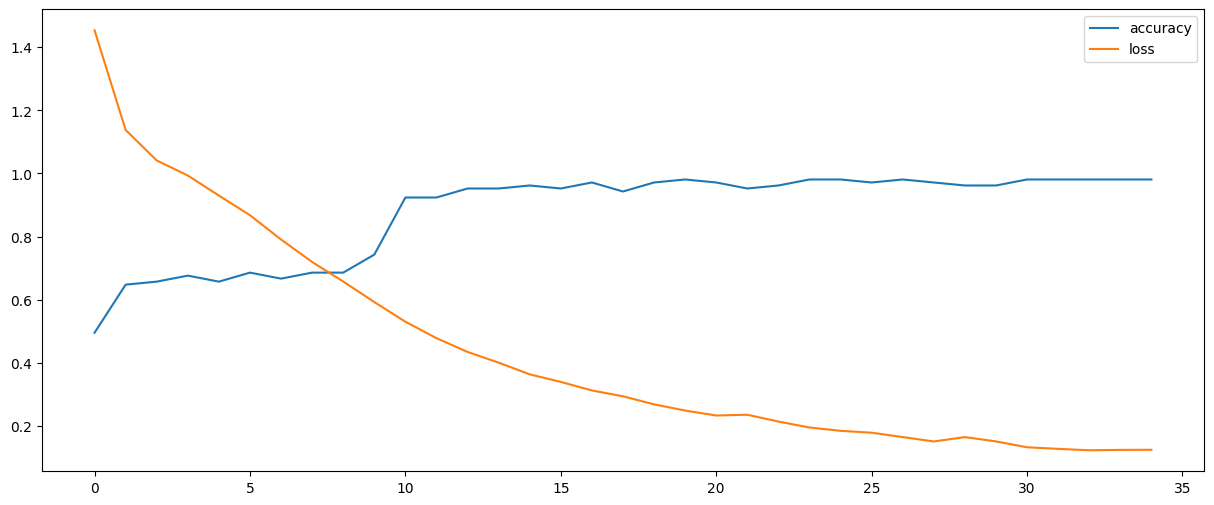

In [17]:
from tensorflow import keras

# Insert your codes ...
model = keras.models.Sequential([
    keras.layers.InputLayer(shape=(4,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=10, epochs=35)

import pandas as pd
pd.DataFrame(history.history).plot(figsize = (15,6))

In [18]:
print('신경망 모델의 학습 결과 :')
eval_loss, eval_acc = model.evaluate(x_test, y_test)
print('붓꽃 데이터의 분류 정확도 :', eval_acc)

신경망 모델의 학습 결과 :
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9556 - loss: 0.1359 
붓꽃 데이터의 분류 정확도 : 0.9555555582046509


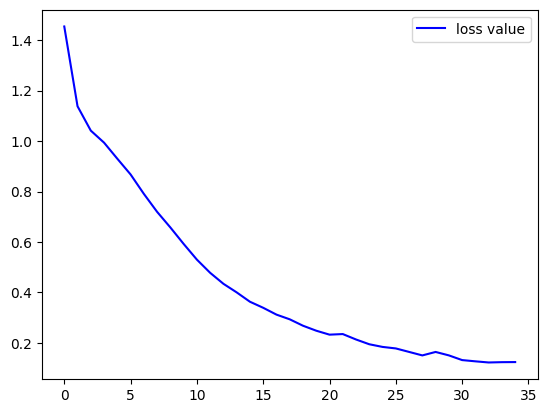

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], 'b-', label='loss value')
plt.legend()

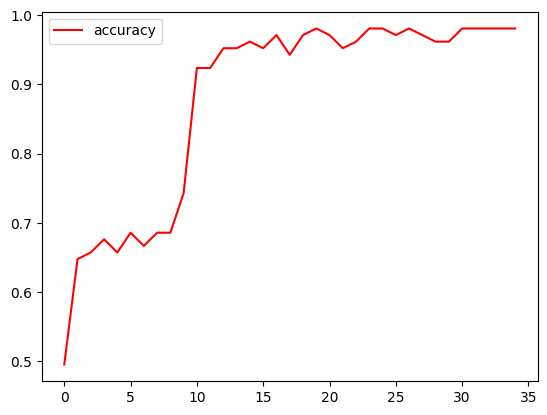

In [20]:
plt.plot(history.history['accuracy'], 'r-', label='accuracy')
plt.legend()